In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
from datetime import datetime as dt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [4]:
temp = []
Humid = [] 
Cloudy = []
Wind_Speed = []
Lat = []
Lng = []
foundcities = []
Date = []


for city in cities:
    params = {
        'appid' : api_key,
        'q' : city,
        'units' : 'imperal'
    }
    print(" finding weather for " +city)
    try:
        response = requests.get(url, params=params).json()
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        Humid.append(response['main']['humidity'])
        Cloudy.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        foundcities.append(response['name'])
        print("found")
    except KeyError:
        print("City " + city + " not found")

    
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

 finding weather for nikolskoye
found
 finding weather for rikitea
found
 finding weather for ilulissat
found
 finding weather for souillac
found
 finding weather for provideniya
found
 finding weather for ushuaia
found
 finding weather for kruisfontein
found
 finding weather for cabo san lucas
found
 finding weather for busselton
found
 finding weather for bonavista
found
 finding weather for rockland
found
 finding weather for barrow
found
 finding weather for bredasdorp
found
 finding weather for butaritari
found
 finding weather for hobart
found
 finding weather for qaanaaq
found
 finding weather for vaini
found
 finding weather for attawapiskat
City attawapiskat not found
 finding weather for touros
found
 finding weather for katsuura
found
 finding weather for port elizabeth
found
 finding weather for cherskiy
found
 finding weather for lebu
found
 finding weather for samusu
City samusu not found
 finding weather for narsaq
found
 finding weather for bathsheba
found
 finding weat

found
 finding weather for wucheng
found
 finding weather for karaul
City karaul not found
 finding weather for pozzallo
found
 finding weather for palembang
found
 finding weather for kushima
found
 finding weather for chuy
found
 finding weather for villarrica
found
 finding weather for bhatkal
found
 finding weather for umm kaddadah
found
 finding weather for mpika
found
 finding weather for kalispell
found
 finding weather for sidi ali
found
 finding weather for masunga
found
 finding weather for cockburn town
found
 finding weather for jacareacanga
found
 finding weather for saint-augustin
found
 finding weather for maumere
found
 finding weather for lata
found
 finding weather for georgetown
found
 finding weather for amderma
City amderma not found
 finding weather for port hedland
found
 finding weather for canguaretama
found
 finding weather for ewo
found
 finding weather for erzincan
found
 finding weather for noumea
found
 finding weather for sao joao da barra
found
 finding 

found
 finding weather for paramonga
found
 finding weather for sinnamary
found
 finding weather for riyadh
found
 finding weather for sapele
found
 finding weather for huarmey
found
 finding weather for aykhal
found
 finding weather for pafos
City pafos not found
 finding weather for ilo
found
 finding weather for sungaipenuh
found
 finding weather for andros town
found
 finding weather for alofi
found
 finding weather for svetlogorsk
found
 finding weather for lagoa
found
 finding weather for xuddur
found
 finding weather for pucallpa
found
 finding weather for panjwin
City panjwin not found
 finding weather for humaita
found
 finding weather for palu
found
 finding weather for asyut
found
 finding weather for katha
City katha not found
 finding weather for mbini
found
 finding weather for ongandjera
found
 finding weather for palestina
found
 finding weather for coxim
found
 finding weather for orbetello
found
 finding weather for yeppoon
found
 finding weather for morsbach
found
 f

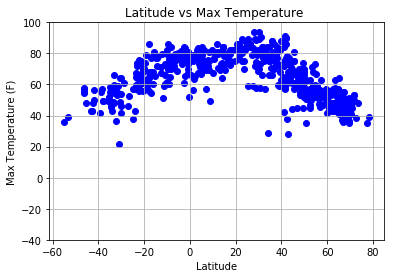

In [5]:
#Build a scatter plot for each data type
plt.scatter([Lat],[temp], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

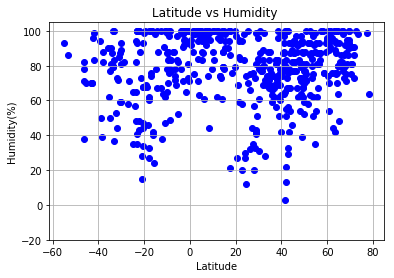

In [6]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Humid], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Humidity ")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

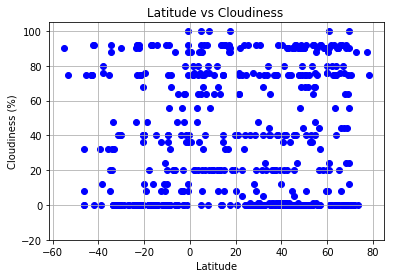

In [7]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Cloudy], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Cloudiness " )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

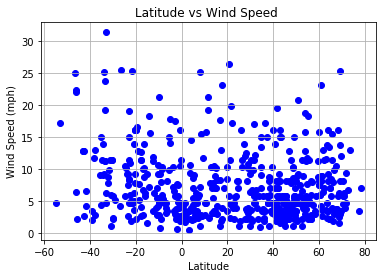

In [8]:
# Build a scatter plot for each data type
plt.scatter([Lat],[Wind_Speed], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [11]:
# creating dataframe

cities_weather_df = {'City' : foundcities,
             'Temp (F)' : temp,
             'Humidity (%)' : Humid,
             'Cloud Cover (%)' : Cloudy,
             'Wind Speed (mph)' : Wind_Speed,
             'Latitude' : Lat,
             'Longitude' : Lng
}

cities_weather_df = pd.DataFrame(cities_weather_df)

# set index
cities_weather_df = cities_weather_df.set_index('City')

# write to csv
cities_weather_df.to_csv('cities_weather_data.csv')
cities_weather_df.head()

,Temp (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Latitude,Longitude
City,,,,,,
Nikolskoye,57.20,93,90,11.18,59.70,30.79
Rikitea,73.71,100,92,8.30,-23.12,-134.97
Ilulissat,37.40,93,75,3.36,69.22,-51.10
Souillac,60.80,82,0,2.24,45.60,-0.60
Provideniya,51.80,76,90,13.42,64.42,-173.23
